In [2]:
# Install TensorFlow for Google Colab
# !pip install -q tensorflow-gpu==2.0.0-beta1 # needed in Colab

# try:
#   %tensorflow_version 2.x  # Colab only.
# except Exception:
#   pass



     |████████████████████████████████| 348.9MB 39kB/s 
     |████████████████████████████████| 501kB 40.0MB/s 
     |████████████████████████████████| 3.1MB 45.7MB/s 
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer # sample data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.1.0


In [4]:
# load the data
data = load_breast_cancer()
print(type(data)) #data is a bunch, acts like a dictionary 
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# targets 
##data.target - binary classification 
##data.target_names - description of the binary class, not useful for learning 
# Features 

data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# let's see what are we dealing with
data.data.shape

(569, 30)

Prepare the data

In [ ]:
# Create test and train sets 
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=0.33)
N, D = X_train.shape

# Scale the data - fundamental for certain type of models. 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the Model

In [14]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid') # binary classification hence 1
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print(f"Train score:{model.evaluate(X_train, y_train)}" )
print(f"Test score: {model.evaluate(X_test, y_test)}", )

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 940us/sample - loss: 1.2034 - accuracy: 0.1732 - val_loss: 1.1354 - val_accuracy: 0.2074
Epoch 2/100
381/381 [==============================] - 0s 87us/sample - loss: 1.0978 - accuracy: 0.2231 - val_loss: 1.0264 - val_accuracy: 0.2606
Epoch 3/100
381/381 [==============================] - 0s 85us/sample - loss: 1.0001 - accuracy: 0.2782 - val_loss: 0.9265 - val_accuracy: 0.3032
Epoch 4/100
381/381 [==============================] - 0s 80us/sample - loss: 0.9135 - accuracy: 0.3307 - val_loss: 0.8367 - val_accuracy: 0.3564
Epoch 5/100
381/381 [==============================] - 0s 87us/sample - loss: 0.8322 - accuracy: 0.4042 - val_loss: 0.7609 - val_accuracy: 0.4894
Epoch 6/100
381/381 [==============================] - 0s 82us/sample - loss: 0.7653 - accuracy: 0.4541 - val_loss: 0.6933 - val_accuracy: 0.5798
Epoch 7/100
381/381 [==============================] - 0s 79us/sample - loss:

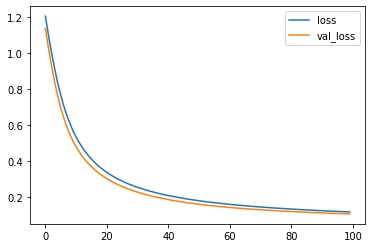

In [16]:
# Plot what's returned by model.fit()
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

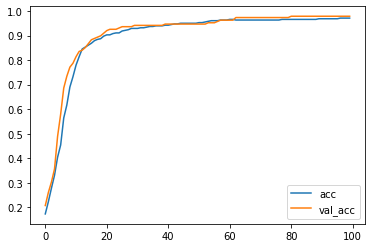

In [17]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Make predictions 

In [19]:
P = model.predict(X_test)
print(P[:8]) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[0.99584985]
 [0.9974234 ]
 [0.795103  ]
 [0.9995523 ]
 [0.98516476]
 [0.00509803]
 [0.99719846]
 [0.9795821 ]]


In [20]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten() #this is only valid of we asume that cut threshold is 0.5
print(P[:8])

[1. 1. 1. 1. 1. 0. 1. 1.]


In [21]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
188/188 [==============================] - 0s 57us/sample - loss: 0.1066 - accuracy: 0.9787
Evaluate output: [0.10657680415092631, 0.9787234]


In [ ]:
# Saving the model 

# Let's now save our model to a file
model.save('linearclassifier.h5')

In [ ]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

In [ ]:

# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')